In [1]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\hatzi\Documents\SUTD\Security Tools Projects\STL1 - Network Anomaly Detection\network_data\Cleaned')

In [2]:
# Import network csv
network_df = pd.read_csv('network_data_binary.csv')

network_df.columns

Index(['src_port', 'dst_port', 'protocol', 'flow_duration', 'flow_byts_s',
       'flow_pkts_s', 'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fin_flag_cnt', 'down_up_ratio', 'pkt_size_avg',
       'init_fwd_win_byts', 'init_bwd_win_byts', 'active_max', 'active_min',
       'active_mean', 'active_std', 'idle_max', 'idle_min', 'idle_mean',
       'idle

In [3]:
print('Number of columns:',len(network_df.columns))
print('Number of rows:', len(network_df))

Number of columns: 69
Number of rows: 32982


<AxesSubplot:ylabel='None'>

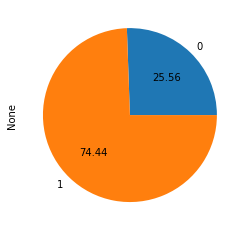

In [4]:
# Get pie chart of xAttack values
network_df.groupby('class').size().plot(kind='pie', autopct ='%.2f')

In [5]:
network_df.dtypes

src_port              int64
dst_port              int64
protocol              int64
flow_duration       float64
flow_byts_s         float64
                     ...   
subflow_fwd_pkts      int64
subflow_bwd_pkts      int64
subflow_fwd_byts      int64
subflow_bwd_byts      int64
class                 int64
Length: 69, dtype: object

In [6]:
# See correlations of variables
correlations = network_df.corr()
corr = {}
for index, row in (correlations[['class']]).iterrows():
    correlation_with_class = row['class']
    corr[index] = correlation_with_class
    
corr = {k: v for k, v in sorted(corr.items(), key=lambda item: item[1])}
corr

{'pkt_len_std': -0.32263868601684864,
 'pkt_len_max': -0.2897455124423252,
 'pkt_len_mean': -0.27936938623134255,
 'pkt_size_avg': -0.27936938623134255,
 'down_up_ratio': -0.26883379848144634,
 'src_port': -0.2545194445290085,
 'bwd_pkt_len_max': -0.2514403565382804,
 'bwd_pkt_len_std': -0.243061230223011,
 'dst_port': -0.23092211829123346,
 'fwd_pkt_len_std': -0.22680602951215428,
 'fwd_pkt_len_max': -0.22469961418472859,
 'init_fwd_win_byts': -0.20189855972786008,
 'pkt_len_var': -0.1443102780320429,
 'bwd_pkt_len_mean': -0.1376689302421016,
 'bwd_seg_size_avg': -0.1376689302421016,
 'protocol': -0.13422283033309873,
 'fwd_pkt_len_mean': -0.12158683298348018,
 'fwd_seg_size_avg': -0.12158683298348018,
 'bwd_byts_b_avg': -0.1187192541273043,
 'bwd_pkts_b_avg': -0.11548767042050337,
 'flow_byts_s': -0.08310662719339539,
 'bwd_blk_rate_avg': -0.06539767521890232,
 'fwd_blk_rate_avg': -0.057407589155886236,
 'totlen_bwd_pkts': -0.051405938332608994,
 'subflow_bwd_byts': -0.05140593833260

## Split into train-test set

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = network_df.loc[:, network_df.columns != 'class']
y = network_df[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Train set size:', len(X_train))
print('Test set size:', len(y_test))

Train set size: 22097
Test set size: 10885


## Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

param_grid=[{"criterion":["gini", "entropy"],
             "splitter":["best", "random"]}]
decision_tree_grid=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
decision_tree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'splitter': ['best', 'random']}])

In [9]:
print('Decision tree best params: ', decision_tree_grid.best_params_)
print('Decision tree test accuracy: ', decision_tree_grid.score(X_test,y_test))

Decision tree best params:  {'criterion': 'entropy', 'splitter': 'random'}
Decision tree test accuracy:  0.9612310519062931


In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_grid.best_estimator_, 
                   feature_names=X_train.columns,  
                   class_names=['0', '1'],
                   filled=True)

In [16]:
# View decision tree visualization
from sklearn import tree
text_representation = tree.export_text(decision_tree_grid.best_estimator_)
print(text_representation)

|--- feature_63 <= 844.31
|   |--- feature_44 <= 1.17
|   |   |--- feature_52 <= 1799798.88
|   |   |   |--- feature_15 <= 281.01
|   |   |   |   |--- feature_44 <= 0.92
|   |   |   |   |   |--- feature_27 <= 13.70
|   |   |   |   |   |   |--- feature_43 <= 0.84
|   |   |   |   |   |   |   |--- feature_13 <= 198.34
|   |   |   |   |   |   |   |   |--- feature_20 <= 147.95
|   |   |   |   |   |   |   |   |   |--- feature_57 <= 170.49
|   |   |   |   |   |   |   |   |   |   |--- feature_22 <= 68.37
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_22 >  68.37
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 30
|   |   |   |   |   |   |   |   |   |--- feature_57 >  170.49
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_20 >  147.95
|   |   |   |   |   |   |   |   |   |--- feature_64 <= 1.34
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 62519

## Multi Layer Perceptron Model

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

GRID = [
    {'scaler': [StandardScaler()],
     'estimator': [MLPClassifier(random_state=42)],
     'estimator__solver': ['adam', 'sgd'],
     'estimator__learning_rate_init': [0.0001, 0.001],
     'estimator__max_iter': [300],
     'estimator__hidden_layer_sizes': [(500, 400, 300, 200, 100), (200, 200, 200, 200, 200)],
     'estimator__activation': ['relu', 'tanh'],
     'estimator__alpha': [0.005, 0.001],
     'estimator__early_stopping': [False, True]
     }
]
PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier())])

grid_search_mlp = GridSearchCV(estimator=PIPELINE, param_grid=GRID, cv=5)
                        
grid_search_mlp.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('estimator', MLPClassifier())]),
             param_grid=[{'estimator': [MLPClassifier(alpha=0.005,
                                                      hidden_layer_sizes=(500,
                                                                          400,
                                                                          300,
                                                                          200,
                                                                          100),
                                                      learning_rate_init=0.0001,
                                                      max_iter=300,
                                                      random_state=42)],
                          'estimator__activation': ['relu'],
                          'estimator__alpha': [0.005],
                          'estimator__early_stoppi

In [13]:
print('MLP test accuracy: ', grid_search_mlp.score(X_test,y_test))

MLP test accuracy:  0.9649977032613689


## Support Vector Machine Model

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

param_grid=[{"kernel":["poly", "rbf", "sigmoid", "linear"] }]
            
cv_svc = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = 5)
cv_svc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(), param_grid=[{'kernel': ['poly']}])

In [10]:
print('SVM best params: ', cv_svc.best_params_)
print('SVM test accuracy: ', cv_svc.score(X_test,y_test))

SVM best params:  {'kernel': 'poly'}
SVM test accuracy:  0.7581074873679375


## Naive Bayes Model

In [11]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train.values.ravel())

GaussianNB()

In [14]:
print('NB test accuracy: ', nb_classifier.score(X_test,y_test))

NB test accuracy:  0.8102893890675241


## Save best model

In [10]:
import pickle
pickle.dump(decision_tree_grid, open("decision_tree.pickle", "wb"))